DEBUG:FFC:Reusing form from cache.


Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_6c5ca7e57a41a502b76e5708bfd2d3cbe0dfd382

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
INFO:FFC:  
INFO:FFC:  Geometric dimension:       1
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'CG4(?)'
  Unique sub elements:       'CG4(?)'
  
INFO:FFC:  Extracting monomial form representation from UFL form
INFO:FFC:  Transforming monomial form to reference element
DEBUG:FFC:  Estimated cost of tensor representation: 0
INFO:FFC:  representation:    auto --> tensor
DEBUG:FFC:  Selecting quadrature degree based on total polynomial degree of integrand: 4
INFO:FFC:  quadrature_degree: auto --> 4
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0204539

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_6c5ffca18c4aaba45e355da2281ddb5c93ca8851

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
INFO:FFC:  
INFO:FFC:  Geometric dimension:       1
  Number of cell subdomains: 0
  Rank:                      0
  Arguments:                 '()'
  Number of coefficients:    2
  Coefficients:              '[f_6, f_13]'
  Unique elements:           'CG1(?), CG4(?)'
  Unique sub elements:       'CG1(?), CG4(?)'
  
INFO:FFC:  Extracting monomial form representation from UFL form
INFO:FFC:  Transforming monomial form to reference element
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Estimated cost of tensor repre

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_4f3fa9c68f53cbf976d1f9c96a645a9ad5195cd3

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
INFO:FFC:  
INFO:FFC:  Geometric dimension:       1
  Number of cell subdomains: 0
  Rank:                      0
  Arguments:                 '()'
  Number of coefficients:    1
  Coefficients:              '[f_13]'
  Unique elements:           'CG4(?)'
  Unique sub elements:       'CG4(?)'
  
INFO:FFC:  Extracting monomial form representation from UFL form
INFO:FFC:  Transforming monomial form to reference element
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Estimated cost of tensor representation: 2
INFO:FFC:  representation:    auto --> tensor
DEBUG:FFC:  Selecting quadrature degree based on total polynomial degree of integrand: 8
INFO:FFC:  quadrature_degree: auto --> 8
INFO:FFC:  quadrature_rule:

<function matplotlib.pyplot.show>

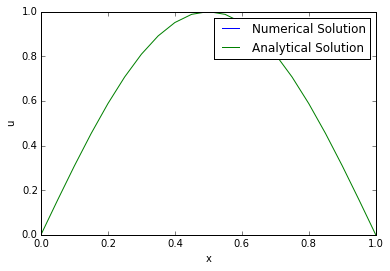

In [1]:
from dolfin import *
import numpy as np
get_ipython().magic('matplotlib inline')
get_ipython().magic('run /home/fenics/fenics-matplotlib.py')

# Define domain and mesh
mesh = UnitIntervalMesh(20)  

# Define function spaces
V = FunctionSpace(mesh, "CG", 1)   
Vhigh = FunctionSpace(mesh, "CG", 4)

# Define test and trial functions
dU = TrialFunction(V)
v = TestFunction(V)
U = Function(V)

# Define boundary and boundary conditions
bc = DirichletBC(V, '0.0', lambda x, on_boundary: on_boundary)

# Exact solution
ue = Expression("sin(pi*x[0])")
uex = interpolate(ue, V)
uehigh = interpolate(ue, Vhigh)

# Initial solution
U_init = Expression("0")
    
# f in Bratu problem 
lamda = 2
f = Expression(("pow(pi,2)*sin(pi*x[0]) - lamda*exp(sin(pi*x[0]) )"), lamda = lamda, degree = 1)

# Weak form of Bratu problem
F = (dot(grad(v), grad(U)) - lamda*exp(U)*v) * dx - f*v*dx
J = derivative(F, U, dU)

# Solve the Bratu problem with Newton's method
# ... your code here ...
    
# Compare numerical and exact solutions
err = sqrt(assemble((uehigh - U)*(uehigh-U)*dx))
ue_norm = sqrt(assemble(uehigh*uehigh*dx))
rel_err = err / ue_norm

# Plot solution
plt.figure
plt.plot(mesh.coordinates(), U.vector().array())
plt.plot(mesh.coordinates(), uex.vector().array())
plt.legend(["Numerical Solution", "Analytical Solution"])
plt.xlabel('x')
plt.ylabel('u')
plt.show